### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Carwling)이라 함
- requests와 beautifulsoup4 패키지 사용

## 1. 웹 문서 전체 가져오기
### 1) urllib.request 패키지
####  1. url 문자열 변환 url 한글 인코딩 디코딩: 
- url 에 한글이 포함될 경우 오류가 나는 경우가 있다. 
-  이때 한글을 url 인코더로 바꿔서 입력해야 한다. 

<pre>
   - urllib 의 quote 와 unquote 사용 
   - quote() : 한글 -> url
   - unquote() : url -> 한글
</pre>
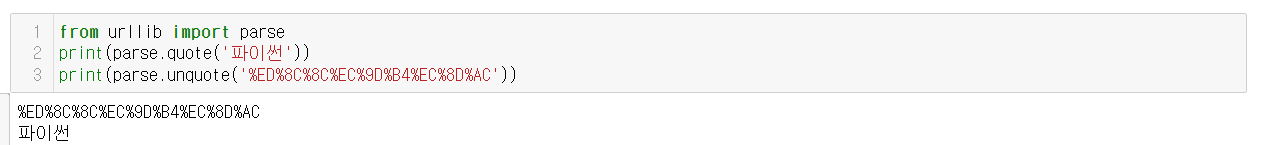
#### 2. 이미지 다운로드
>from urllib import request <br>
>request.urlretrieve('이미지url주소','파일명')

In [1]:
#url 한글 인코딩
from urllib import parse
print(parse.quote('파이썬'))
print(parse.unquote('%ED%8C%8C%EC%9D%B4%EC%8D%AC'))

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬


In [3]:
# url open
from urllib.request import urlopen
from bs4 import BeautifulSoup as BS

#'파이썬' 네이버 지식인

html=urlopen('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html,'html.parser')
print(soup)

<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="파이썬 : 네이버 지식iN검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'파이썬'의 네이버 지식iN검색 결과입니다." property="og:description"/> <meta content="'파이썬'의 네이버 지식iN검색 결과입니다." lang="ko" name="description"/> <title>파이썬 : 네이버 지식iN검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240201.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

In [4]:
# 이미지 다운로드
from urllib import request
request.urlretrieve('https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA3MTdfNSAg%2FMDAxNjU4MDU1NDk1MTMx.gYMOxufPdVxeftoxCjvARt0ySZWV_RTDJR27cvThAY0g.gYfUC3nvJImAhTzwHOvq18hYpwof9EQyo9-6Q6Ob9uEg.JPEG.monica32d%2F%25EA%25B0%2595%25EC%2595%2584%25EC%25A7%253F%25EB%25B6%2584%25EC%2596%2591240.jpg&type=a340','img01.jpg')

('img01.jpg', <http.client.HTTPMessage at 0x202069e7210>)

In [5]:
pwd

'C:\\Users\\hmh\\Documents\\py\\___\\데이터분석\\크롤링_01'

### 2) requests 패키지

In [6]:
import requests
from bs4 import BeautifulSoup as bs

#'파이썬' 네이버 지식인 검색어:'파이썬'

html=requests.get('https://search.naver.com/search.naver?where=kin&sm=tab_jum&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC') 
soup=BS(html.text,'html.parser')
#print(soup))

In [7]:
soup

<!DOCTYPE html>
 <html lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="파이썬 : 네이버 지식iN검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'파이썬'의 네이버 지식iN검색 결과입니다." property="og:description"/> <meta content="'파이썬'의 네이버 지식iN검색 결과입니다." lang="ko" name="description"/> <title>파이썬 : 네이버 지식iN검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240201.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

### 3) html 태그로 원하는 정보 추출

In [9]:
#find_all로 찾기
s_tags1=soup.find_all('strong','elss')
s_tags1

[<strong class="elss tit">올겨울, 여행은 여기로 떠나요</strong>,
 <strong class="elss tit">AI 검색, 아직 안 써봤다면?</strong>,
 <strong class="elss tit">CLOVA X와 함께 대화해 보세요</strong>,
 <strong class="elss tit">이번 달은 꼭 적립 받고 사세요!</strong>]

In [10]:
#select로 찾기
soup.select('strong.elss')

[<strong class="elss tit">올겨울, 여행은 여기로 떠나요</strong>,
 <strong class="elss tit">AI 검색, 아직 안 써봤다면?</strong>,
 <strong class="elss tit">CLOVA X와 함께 대화해 보세요</strong>,
 <strong class="elss tit">이번 달은 꼭 적립 받고 사세요!</strong>]

In [11]:
#텍스트만 추출
for s in s_tags1:
    print(s.text)

올겨울, 여행은 여기로 떠나요
AI 검색, 아직 안 써봤다면?
CLOVA X와 함께 대화해 보세요
이번 달은 꼭 적립 받고 사세요!


### [미션] 파이썬 연관검색어 정보 추출

In [12]:
#find_all
div_tags=soup.find_all('div','tit')
display(div_tags)

[<div class="tit">파이썬 독학</div>,
 <div class="tit">파이썬 자격증</div>,
 <div class="tit">파이썬 기초</div>,
 <div class="tit">점프투파이썬</div>,
 <div class="tit">파이썬 책</div>,
 <div class="tit">혼자 공부하는 파이썬</div>,
 <div class="tit">파이썬 학원</div>,
 <div class="tit">파이썬 뜻</div>,
 <div class="tit">파이썬 다운로드</div>,
 <div class="tit">파이썬 설치</div>]

In [13]:
#select
div_tags=soup.select('div.tit')

In [14]:
for div in div_tags:
    print(div.text)

파이썬 독학
파이썬 자격증
파이썬 기초
점프투파이썬
파이썬 책
혼자 공부하는 파이썬
파이썬 학원
파이썬 뜻
파이썬 다운로드
파이썬 설치


### [미션] 글 제목만 추출

In [12]:
#find_all 
a_tags=soup.find_all('a','api_txt_lines question_text')

In [13]:
for idx,a in enumerate(a_tags,1):
    print(idx,a.text)

1 파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ
2 파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??
3 파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제하려고 하는데 파이썬 하나만 있어도 똑같이 사용가능한건가요?
4 파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인으로 파이썬 교육을 듣고싶은데 국비지원으로 할수 있나요?? 대략 능숙하게 사용하려면 어느정도 기간이 걸리는지 궁금합니다 ㅜㅜ!
5 고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는 문제 해결 과정이랑 답 알고싶어요 급해요
6 파이썬을 입문하고싶습니다 코딩에 관심이생겨서 한번해보고싶은게 파이썬인데 파이썬으로 무엇을할수있고 뭐부터 하는게 좋을까요?
7 인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고 제대로 한 거 같지가 않아 제대로 한번 공부해보고 싶습니다. 인프런에서 강의를 들으려고 하는데 그냥 아예 파이썬의 기본개념부터 즉, 아예 처음부터 다시하고 싶어요. 그런데 인프런가보니깐 강의가... 
8 요새 파이썬으로 개발하는 이유
9 엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고 하는데요 제가 엑셀에서 통장번호를 입력하고 그버튼을 누르면 제가능록한 통장에 얼마가 입금되는지 엑셀에 연동되서 나타나게 하려면 엑셀vba가지고 만들어야 되난요? 아니면 파이썬 가지고 만들어야 되나요? 혹시 아시는분 계시나요?
10 파이썬 프로그램 주제 심리테스트 너무 흔한가요? 혹시 흔하면 파이썬 프로그램 주제 추천해 주실수있나요?


In [14]:
#select
a_tags1=soup.select('a.question_text')

In [15]:
for idx,a in enumerate(a_tags1,1):
    print(idx,a.text)

1 파이썬 코드 오류 파이썬으로 그래프 그리려고 하는데 대체 왜 오류가 뜨는 걸까요? ㅠㅠ
2 파이썬 인티저 파이썬에 인티저가 input인가요?? input 줄인게 int 맞나요??
3 파이썬? 파이참? 파이참, 파이썬 둘 다 설치했는데 파이참 용량이 너무 커서요 삭제하려고 하는데 파이썬 하나만 있어도 똑같이 사용가능한건가요?
4 파이썬 국비지원 현재 프로그래밍에 대한 기초가 하나도 없고 일을 하고 있는데 온라인으로 파이썬 교육을 듣고싶은데 국비지원으로 할수 있나요?? 대략 능숙하게 사용하려면 어느정도 기간이 걸리는지 궁금합니다 ㅜㅜ!
5 고1 정보 파이썬 질문 주피터노트북 파이썬으로 만들어야되는데 파이썬으로 사진에 있는 문제 해결 과정이랑 답 알고싶어요 급해요
6 파이썬을 입문하고싶습니다 코딩에 관심이생겨서 한번해보고싶은게 파이썬인데 파이썬으로 무엇을할수있고 뭐부터 하는게 좋을까요?
7 인프런에서 파이썬 배우기 대학 수업에서 파이썬을 배우긴 했지만 굉장히 기초만 배웠고 제대로 한 거 같지가 않아 제대로 한번 공부해보고 싶습니다. 인프런에서 강의를 들으려고 하는데 그냥 아예 파이썬의 기본개념부터 즉, 아예 처음부터 다시하고 싶어요. 그런데 인프런가보니깐 강의가... 
8 요새 파이썬으로 개발하는 이유
9 엑셀vba랑 파이썬 둘중에 어느걸 써야되는건가요? 엑셀로 가계부를 만들어 사용하려고 하는데요 제가 엑셀에서 통장번호를 입력하고 그버튼을 누르면 제가능록한 통장에 얼마가 입금되는지 엑셀에 연동되서 나타나게 하려면 엑셀vba가지고 만들어야 되난요? 아니면 파이썬 가지고 만들어야 되나요? 혹시 아시는분 계시나요?
10 파이썬 프로그램 주제 심리테스트 너무 흔한가요? 혹시 흔하면 파이썬 프로그램 주제 추천해 주실수있나요?


### [미션] '글제목'과 '하이퍼링크주소'를 추출하여 데이터프레임 형태로 저장하세요.


In [15]:
import pandas as pd

In [16]:
#find_all 
a_tags=soup.find_all('a','api_txt_lines question_text')

In [24]:
res=[]
for a in a_tags:
    title=a.text
    url=a['href']
    res.append({'제목':title,'url':url})
df=pd.DataFrame(res)
display(df)

,제목,url
0,파이썬 코드끼리 연결 각각 인원을 분배해 파이썬 코드를 만들었는데 다 실행은 되고요...,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,"비주얼스튜디오코드 파이썬 질문합니다, f5를 눌러서 실행하려고하는데 파이썬 디버거가...",https://kin.naver.com/qna/detail.naver?d1id=1&...
2,파이썬에서 증가값이 머에요?,https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬 책 추천 지금 라즈베리파이로 웹서버 개발중인데 언어를 파이썬으로 개발할려고 ...,https://kin.naver.com/qna/detail.naver?d1id=1&...
4,파이썬 문제 답 파이썬 문젠데 왜 답이 4번인지 알려주세요 ㅠㅠ,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬 write함수 질문 ... write(text) f.close 이잖아요. 근...,https://kin.naver.com/qna/detail.naver?d1id=1&...
6,파이썬 python -V 에서 에러 파이썬을 설치하고 버전을 물어보는 질문에서 이렇...,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,파이썬 개발자가 취업 시장에 수요가 있나요? 아는 친구가 비전공인데 ai쪽으로 열심...,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,맥북 파이썬 설치 안녕하세요. 현재 맥북 에어15 사용중입니다. 파이썬 독학하려고 ...,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,파이썬독학 도와주세요ㅠ 책보면서 파이썬독학 시작했는데요 다들 쉽다고해서 독학 시작했...,https://kin.naver.com/qna/detail.naver?d1id=11...


### [미션] '글제목, 작성자, 요약글, 작성일, href' 을 테이블형태로 수집

In [21]:
import pandas as pd

In [25]:
div_tags=soup.find_all('div','kin_wrap')

In [28]:
print(div_tags[0])

<div class="kin_wrap"><div class="question_area"><i class="spnew api_ico_q">Q</i><div class="question_group"><div class="api_save_group _keep_wrap"><a aria-pressed="false" class="btn_save _keep_trigger" data-cr-off="a=kin*k.kep&amp;r=1&amp;i=10000009_00001b74d5c0&amp;u=javascript" data-cr-on="a=kin*k.kep&amp;r=1&amp;i=10000009_00001b74d5c0&amp;u=javascript" data-url="https://kin.naver.com/qna/detail.naver?dirId=10402&amp;docId=460641728" href="javascript;" role="button"><i class="spnew ico_save">문서 저장하기</i></a><div class="api_ly_save _keep_save_layer"><a class="spnew_af item item_save _keep_save" data-cr-off="kin*k.kepoff&amp;r=1&amp;i=10000009_00001b74d5c0&amp;u=javascript" data-cr-on="kin*k.kepon&amp;r=1&amp;i=10000009_00001b74d5c0&amp;u=javascript" href="javascript;" role="button">Keep에 저장</a>
<a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick='return goOtherCR(this,"a=kin*k.kephome&amp;r=1&amp;i=10000009_00001b74d5c0&amp;u="+urlencode(urlexpand(this.href)))'

In [30]:
res=[]
for div in div_tags:
    title=div.find('a','api_txt_lines question_text').text
    writer=div.find('span','name').text
    contents=div.find('a','api_txt_lines answer_text').text
    date=div.find('span','etc date').text
    url=div.find('a','api_txt_lines question_text')['href']
    tmp={'제목':title,
         '작성자':writer,
         '글내용':contents,
         '작성일':date,
         'url':url}
    res.append(tmp)
df=pd.DataFrame(res)
display(df)

,제목,작성자,글내용,작성일,url
0,파이썬 코드끼리 연결 각각 인원을 분배해 파이썬 코드를 만들었는데 다 실행은 되고요...,김현균,아래와 같이 모듈울 참고해 보세요. 05-2 모듈 - 점프 투 파이썬 (wikido...,2023.12.19.,https://kin.naver.com/qna/detail.naver?d1id=1&...
1,"비주얼스튜디오코드 파이썬 질문합니다, f5를 눌러서 실행하려고하는데 파이썬 디버거가...",용용,폴더를 하나 만들고 그 폴더에 저 파일을 저장하세요. 그리고 해당 폴더를 여세요. ...,20시간 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
2,파이썬에서 증가값이 머에요?,오렌지팜,range() 말씀 이신가요? range() 는 제네레이터라고 하며 리스트를 발생하...,2주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
3,파이썬 책 추천 지금 라즈베리파이로 웹서버 개발중인데 언어를 파이썬으로 개발할려고 ...,엑플하나하나,말씀하신 그 책 두개 추천드립니다. 그리고 위키독스 점푸 투 파이썬만 검색해서 쭉 ...,2024.01.03.,https://kin.naver.com/qna/detail.naver?d1id=1&...
4,파이썬 문제 답 파이썬 문젠데 왜 답이 4번인지 알려주세요 ㅠㅠ,김팀장,"설명에 있는데요 in 연산자를 통해 b 가 a 안에 있으면 True,아니면 Fals...",2주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
5,파이썬 write함수 질문 ... write(text) f.close 이잖아요. 근...,푸른하늘,"Windows는 경로 구분자로 역슬래시(\)를 사용하지만, 파이썬 문자열에서 역슬래...",1주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
6,파이썬 python -V 에서 에러 파이썬을 설치하고 버전을 물어보는 질문에서 이렇...,Desty,스크린샷으로 보여주신 것은 파이썬 대화식 모드입니다. >>> 부분에는 파이썬 코드가...,2주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
7,파이썬 개발자가 취업 시장에 수요가 있나요? 아는 친구가 비전공인데 ai쪽으로 열심...,종로 3가,"파이썬 개발자 생각보다 수요가 좀 있습니다. 말씀해 주신 것처럼 웹 개발, 앱 개발...",2주 전,https://kin.naver.com/qna/detail.naver?d1id=1&...
8,맥북 파이썬 설치 안녕하세요. 현재 맥북 에어15 사용중입니다. 파이썬 독학하려고 ...,애플백과사전,애플 맥북에 파이썬 다운로드:** - 기본적으로 맥에는 파이썬이 설치되어 있습니다....,2023.12.05.,https://kin.naver.com/qna/detail.naver?d1id=1&...
9,파이썬독학 도와주세요ㅠ 책보면서 파이썬독학 시작했는데요 다들 쉽다고해서 독학 시작했...,abun****,파이썬독학 도와주세요ㅠ 책보면서 파이썬독학 시작했는데요 다들 쉽다고해서 독학 시작했...,2주 전,https://kin.naver.com/qna/detail.naver?d1id=11...
